### Çizgi Grafik

*Özellikle makinelerin ürettiği verileri, IOT verilerini görselleştirmek için çok kullanışlıdır.*

### Veri Seti Hikayesi

*Beyne bağlanan bir cihaz ile beyin sinyallerinin toplanıp oluşturulduğu bir veri setini inceleyeceğiz.*<br>
*subject = beyin sinyallerinin toplandığı denek numarası*<br>
*timepoint = sinyalin toplandığı zaman damgası*<br>
*event = beyin aktivitesi*<br>
*region = beyin sinyalinin alındığı beyin bölgesi*<br>
*signal = alınan sinyal*

In [1]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [2]:
df.shape

(1064, 5)

In [3]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [4]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [5]:
#Her bir timepoint'te eşit sinyal mi toplanmış?
#Her bir timepoint için alınan toplam sinyalı hesaplamak için groupby işlemi yapılır.
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [6]:
#Ölçülen her bir signal uniqe mi?
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [7]:
# Her bir zaman noktası için signal istatistiklerini al
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


### Çizgi Grafik ve Caprazlamalar

<Axes: xlabel='timepoint', ylabel='signal'>

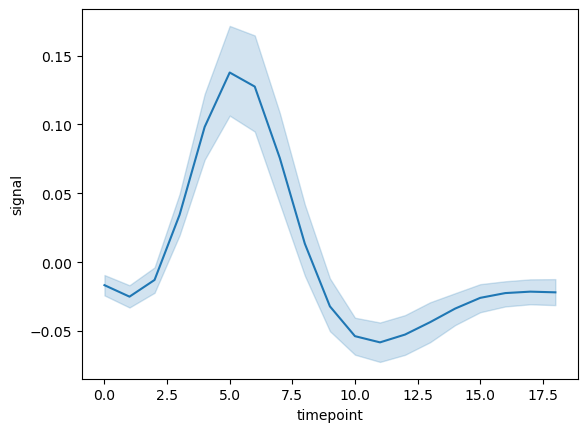

In [8]:
sns.lineplot(x = "timepoint", y = "signal", data = df)

*Yukarıdaki grafiği inceleyelim. Grafikteki koyu mavi renkli mavi çizgi ; Her bir Timepoint'ten makine tarafından çekilen 56 sinyalin ortalaması sonucu elde edilmiştir. Mavi çizginin etrafındaki daha açık renkteki bulutumsu alanlar ise bu sinyallerin standart sapmasını gösteriyor. Açık renkteki mavi alanın daralması sinyallerin daraldığını, genişlemesi is sinyal değerinin arttığını gösteriyor.*

*Yeni bir boyut ekleyerek, yani çaprazlama yaparak veri setini daha net bir şekilde anlayabileceğimizi biliyoruz.:*

<Axes: xlabel='timepoint', ylabel='signal'>

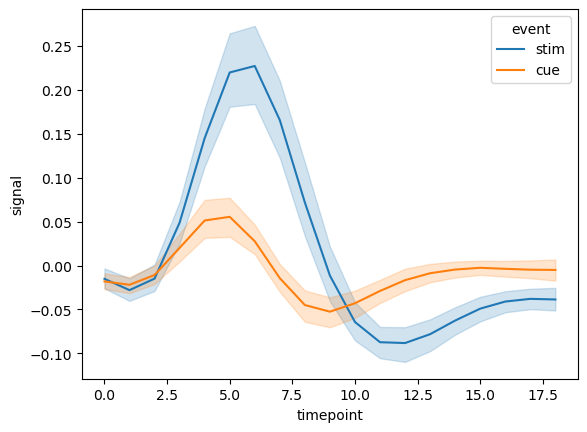

In [9]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df)

*Yukarıdaki grafikten sinyal sıçramasını(peak) meydana getiren durumun "stim" olayının olduğunu görüyoruz. Bir önceki grafiğe bakarak bu yorumu yapamazdık.*

<Axes: xlabel='timepoint', ylabel='signal'>

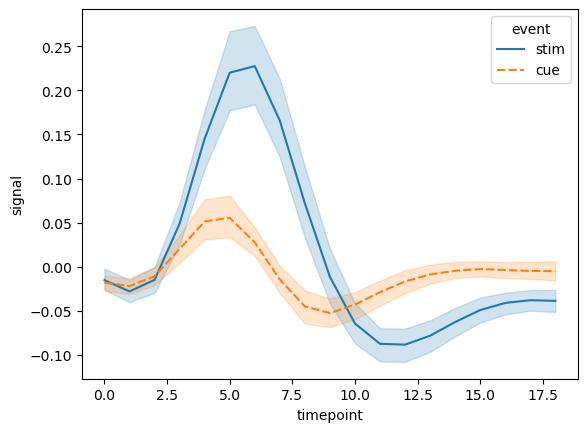

In [10]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df)

<Axes: xlabel='timepoint', ylabel='signal'>

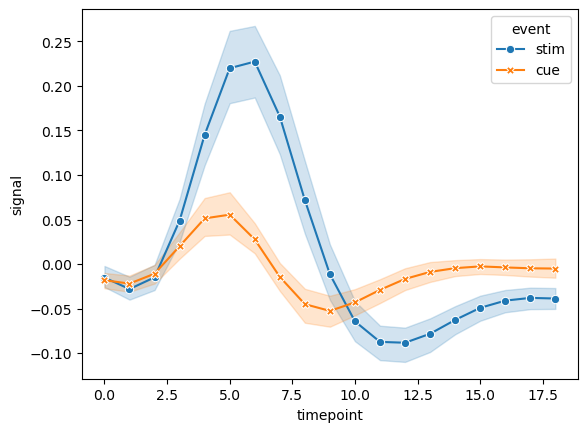

In [11]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event",
             markers = True,
             dashes = False,
             data = df)

<Axes: xlabel='timepoint', ylabel='signal'>

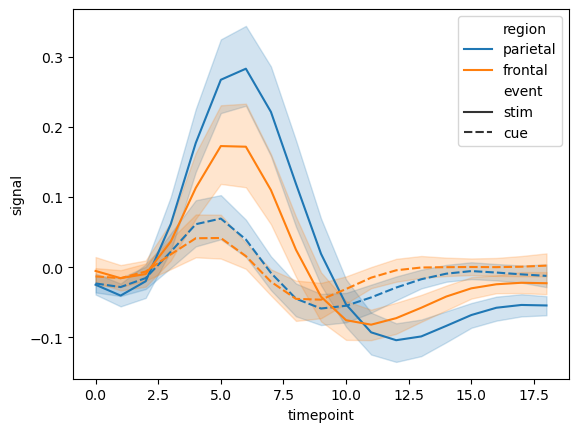

In [12]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event",
             data = df)

*Grafikten beyin sinyalindeki ani sıçramanın beynin "parietal" bölgesinde en yüksek olduğu sonucunu çıkarıyoruz.*